# Lista 8

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from mylibs import perceptron
from mylibs import adalineGD
from mylibs import adalineSGD

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corrwith(df[8])

0    0.221898
1    0.466581
2    0.065068
3    0.074752
4    0.130548
5    0.292695
6    0.173844
7    0.238356
8    1.000000
dtype: float64

In [4]:
X = df[[1, 5]] # 2 features com maior correlacao com y
y = df[8]

### Convertendo dados para array do numpy

In [5]:
X = np.array(X)

### Padronizando dados

In [6]:
X_standard = StandardScaler().fit(X).transform(X)
X_standard

array([[ 0.84832379,  0.20401277],
       [-1.12339636, -0.68442195],
       [ 1.94372388, -1.10325546],
       ...,
       [ 0.00330087, -0.73518964],
       [ 0.1597866 , -0.24020459],
       [-0.8730192 , -0.20212881]])

### Região de decisão

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    plt.legend(loc='upper left')
    plt.show()

### Perceptron

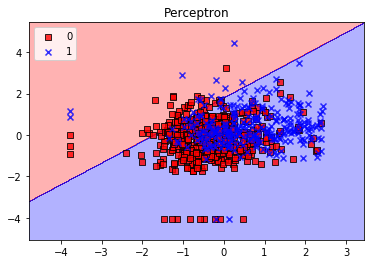

In [8]:
ppn = perceptron.Perceptron()
ppn.fit(X_standard, y)
plt.title('Perceptron')
plot_decision_regions(X_standard, y, classifier=ppn)

### Adaline GD

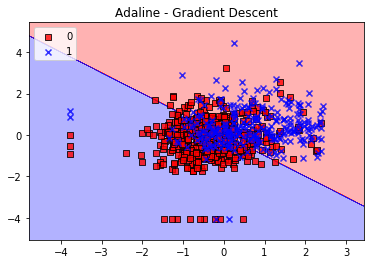

In [9]:
ada = adalineGD.AdalineGD()
ada.fit(X_standard, y)
plt.title('Adaline - Gradient Descent')
plot_decision_regions(X_standard, y, classifier=ada)

### AdalineSGD

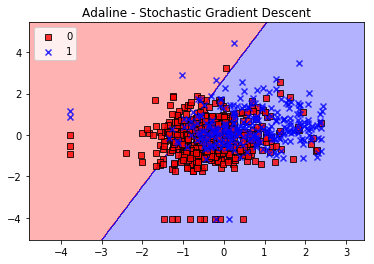

In [21]:
adagd = adalineSGD.AdalineSGD(n_iter=50, eta=0.3, random_state=1)
adagd.fit(X_standard, y)
plt.title('Adaline - Stochastic Gradient Descent')
plot_decision_regions(X_standard, y, classifier=adagd)